In [11]:
# Display the first few rows of the dataset

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

walmart_sales = pd.read_csv('Walmart.csv')

walmart_sales.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Convert the 'Date' column to datetime format with the correct format
# Set 'Date' as the index of the dataframe
# Handle missing values if necessary
# Explore the dataset after data preparation

walmart_sales['Date'] = pd.to_datetime(walmart_sales['Date'], format='%d-%m-%Y')

walmart_sales.set_index('Date', inplace=True)

walmart_sales.dropna(inplace=True)  # Drop rows with missing values, if any

walmart_sales.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


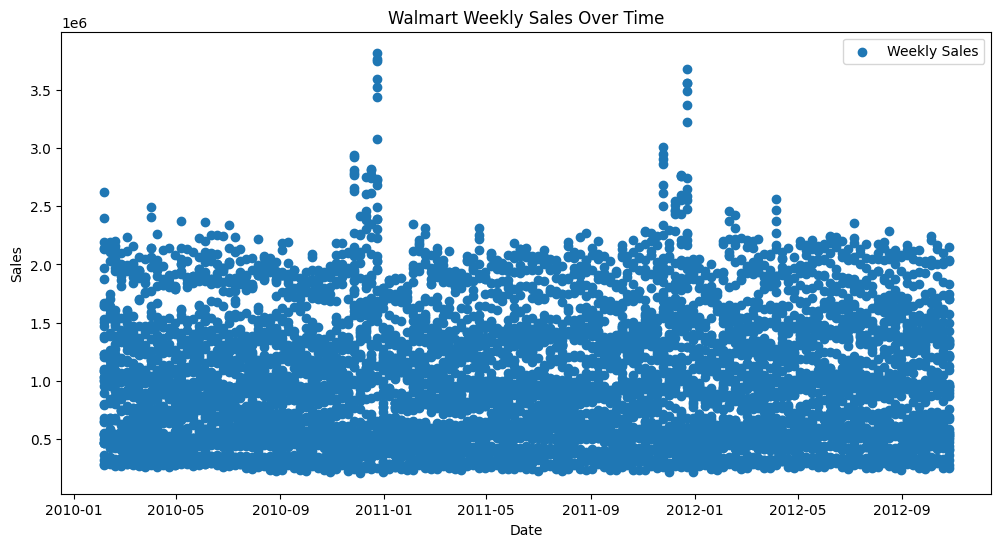

In [7]:

# Visualize the trend of weekly sales over time
plt.figure(figsize=(12, 6))
plt.scatter(walmart_sales.index, walmart_sales['Weekly_Sales'], label='Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Walmart Weekly Sales Over Time')
plt.legend()
plt.show()


In [17]:
# SARIMAX modeling for sales forecasting
order = (5, 1, 0)  # Example order, tune as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, tune as needed

model = SARIMAX(walmart_sales['Weekly_Sales'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecast sales for the next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)

# Slice the forecasted values to match the length of the index
forecast_values = forecast.predicted_mean.values[-forecast_steps:]

# Create a DataFrame for the forecasted values with the correct index
forecast_index = pd.date_range(start=walmart_sales.index[-1], periods=forecast_steps, freq='MS')
forecast_series = pd.Series(forecast_values, index=forecast_index, name='Forecasted_Sales')

# Print the sales forecast for the next 12 months
print(forecast_series)

1970-01-01 00:00:00.000006434    755723.637767
1970-02-01 00:00:00.000006434    749383.307277
1970-03-01 00:00:00.000006434    737459.716555
1970-04-01 00:00:00.000006434    757769.271858
1970-05-01 00:00:00.000006434    745764.165050
1970-06-01 00:00:00.000006434    748254.206963
1970-07-01 00:00:00.000006434    735692.165990
1970-08-01 00:00:00.000006434    749308.502593
1970-09-01 00:00:00.000006434    745240.452518
1970-10-01 00:00:00.000006434    753398.087949
1970-11-01 00:00:00.000006434    741915.430955
1970-12-01 00:00:00.000006434    746742.868847
Freq: MS, Name: Forecasted_Sales, dtype: float64
